In [2]:
%matplotlib inline
import pandas as pd

In [3]:
from IPython.core.display import HTML
css = open('style-table.css').read() + open('style-notebook.css').read()
HTML('<style>{}</style>'.format(css))

In [4]:
titles = pd.DataFrame.from_csv('data/titles.csv', index_col=None)
titles.head()

,title,year
0,Hand in Hand,1985
1,The Caravaggio Conspiracy,1984
2,Postcard Days,2010
3,Haebyeoneuro gada,2000
4,Royal Blues,1997


In [5]:
cast = pd.DataFrame.from_csv('data/cast.csv', index_col=None)
cast.head()

,title,year,name,type,character,n
0,Closet Monster,2015,Buffy #1,actor,Buffy 4,31.0
1,Suuri illusioni,1985,Homo $,actor,Guests,22.0
2,Battle of the Sexes,2017,$hutter,actor,Bobby Riggs Fan,10.0
3,Secret in Their Eyes,2015,$hutter,actor,2002 Dodger Fan,NaN
4,Steve Jobs,2015,$hutter,actor,1988 Opera House Patron,NaN


### Define a year as a "Superman year" whose films feature more Superman characters than Batman. How many years in film history have been Superman years?

In [14]:
c = cast
c = c[(c.character == 'Superman')|(c.character == 'Batman')]
c = c.groupby(['year', 'character']).size()
c = c.unstack()
c = c.fillna(0)

d = c.Superman  - c. Batman
print ('Superman years: ')
print(len(d[d>0]))


Superman years: 
12


### How many years have been "Batman years", with more Batman characters than Superman characters?

In [18]:
c = cast
c = c[(c.character == 'Superman')|(c.character == 'Batman')]
c = c.groupby(['year', 'character']).size()
c = c.unstack()
c = c.fillna(0)

d = c.Batman - c.Superman
print('Batman years:')
print(len(d[d>0]))

Batman years:
26


### Plot the number of actor roles each year and the number of actress roles each year over the history of film.

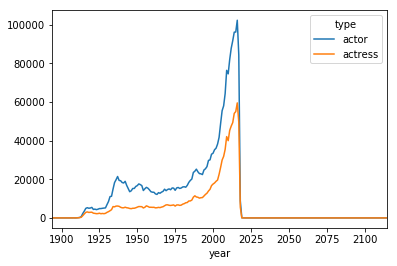

In [26]:
c = cast
c = c.groupby(['year','type']).size()
c = c.unstack()
c = c.fillna(0)
c.plot()


### Plot the number of actor roles each year and the number of actress roles each year, but this time as a kind='area' plot.

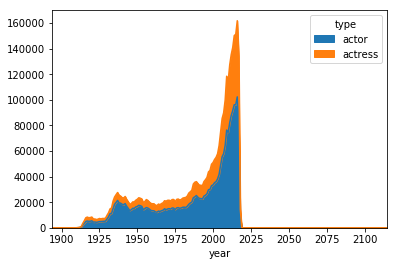

In [30]:
c = cast
c = c. groupby(['year', 'type']).size()
c = c. unstack()
c = c.fillna(0)
c.plot(kind = 'area')

### Plot the difference between the number of actor roles each year and the number of actress roles each year over the history of film.

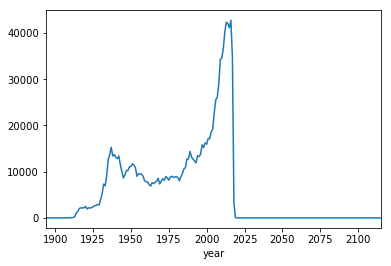

In [49]:
c = cast
c = c.groupby(['year','type']).size()
c = c.unstack('type')
c = c.fillna(0)
(c.actor - c.actress).plot()

### Plot the fraction of roles that have been 'actor' roles each year in the hitsory of film.

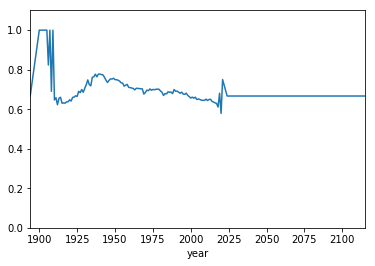

In [59]:
c = cast
c = c.groupby(['year','type']).size()
c = c.unstack('type')
c = c.fillna(0)
#d = c[(c.actor/(c.actor+c.actress))>=1]
#d
(c.actor/(c.actor + c.actress)).plot(ylim=[0,1.1])


### Plot the fraction of supporting (n=2) roles that have been 'actor' roles each year in the history of film.

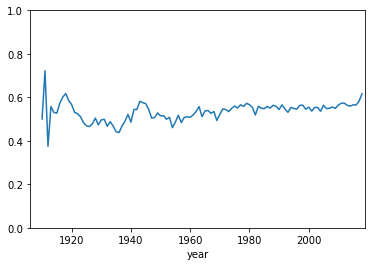

In [67]:
c = cast
c = c[c.n ==2]
c = c.groupby(['year','type']).size()
c = c.unstack('type')
(c.actor / (c.actor + c.actress)).plot(ylim=[0,1])

### Build a plot with a line for each rank n=1 through n=3, where the line shows what fraction of that rank's roles were 'actor' roles for each year in the history of film.

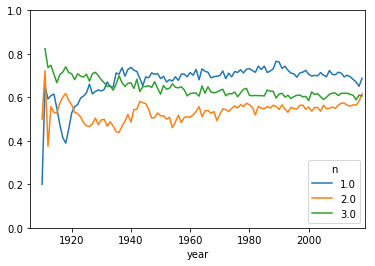

In [80]:
c = cast
c = c[c.n <=3]
c = c.groupby(['year', 'type', 'n']).size()
c = c.unstack('type')
r = c.actor / (c.actor + c.actress)
r = r.unstack('n')
r.plot(ylim =[0,1])
